In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
df=pd.read_csv('BankNote_Authentication.csv')
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [63]:
df.shape

(1372, 5)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [65]:
df.isnull().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

In [66]:
df.skew()

variance   -0.149388
skewness   -0.394103
curtosis    1.088569
entropy    -1.022243
class       0.223191
dtype: float64

In [67]:
df.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


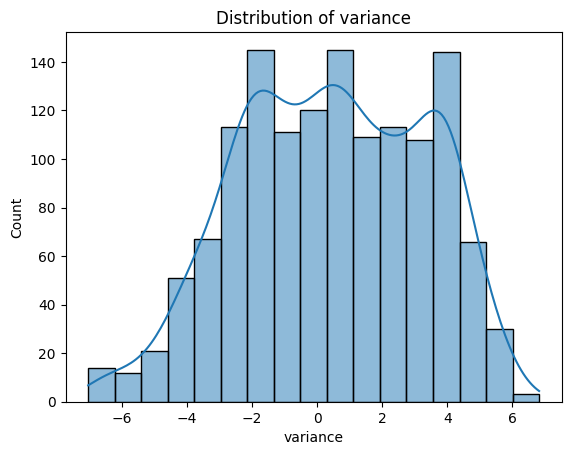

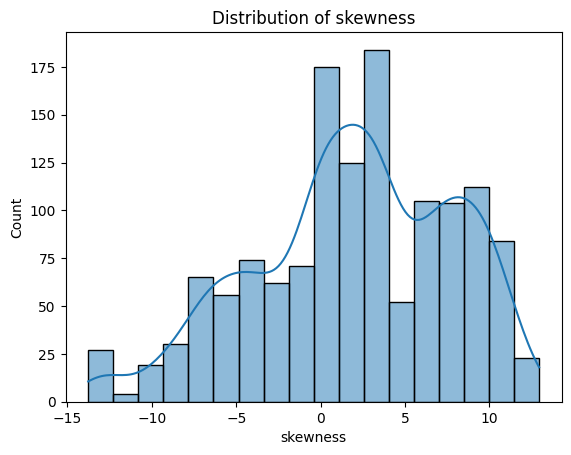

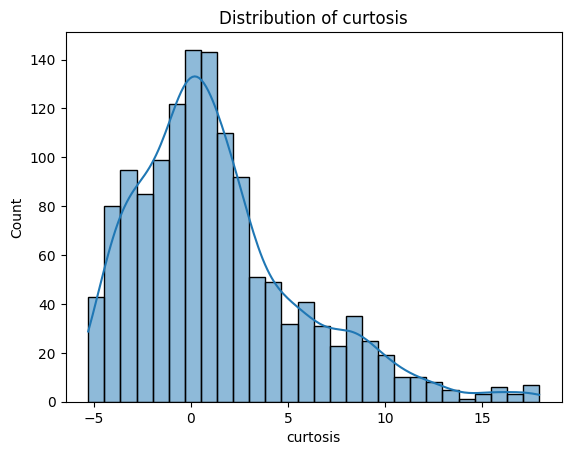

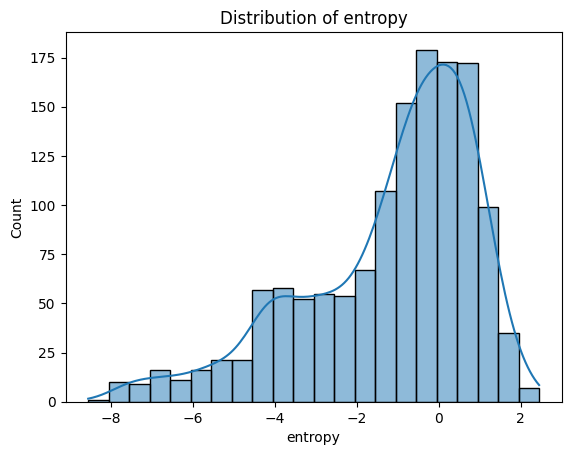

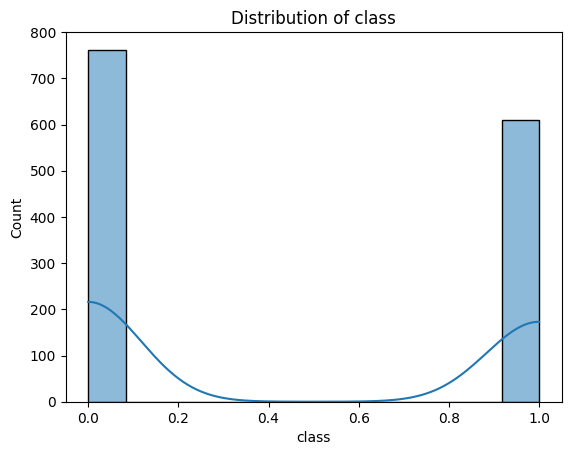

In [68]:
for columns in df.columns:
    plt.figure()
    sns.histplot(df[columns], kde=True)
    plt.title(f'Distribution of {columns}')
    plt.show()

In [69]:
for columns in df.columns:
    Q1 = df[columns].quantile(0.25)
    Q3 = df[columns].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[columns] >= lower_bound) & (df[columns] <= upper_bound)]

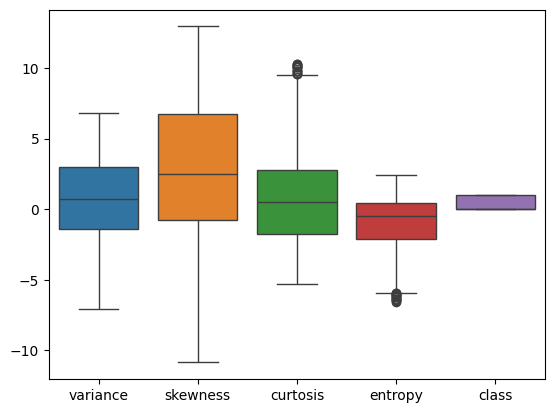

In [70]:
sns.boxplot(data=df)
plt.show()

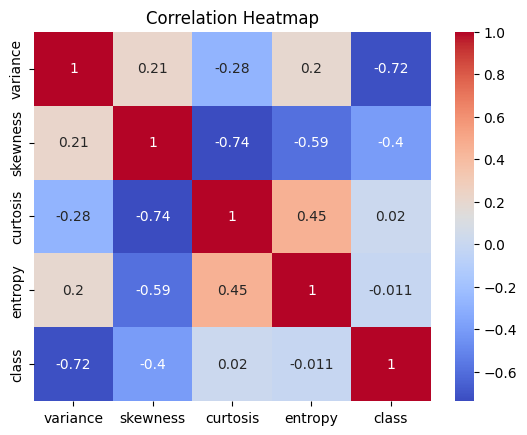

In [71]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [72]:
df.skew()

variance   -0.150687
skewness   -0.237913
curtosis    0.585809
entropy    -0.845043
class       0.333559
dtype: float64

In [73]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')
numerical_cols = df.select_dtypes(include=[np.number]).columns
numerical_cols=df.drop('class',axis=1).columns
df[numerical_cols] = pt.fit_transform(df[numerical_cols])
df.skew()

variance   -0.092427
skewness   -0.069800
curtosis    0.027945
entropy     0.024349
class       0.333559
dtype: float64

In [74]:
X=df.drop('class',axis=1)
y=df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [75]:
lrmodel = LogisticRegression()
lrmodel.fit(X_train_scaled, y_train)

y_pred = lrmodel.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))



Accuracy: 0.99609375


In [76]:
rfmodel = RandomForestClassifier()
rfmodel.fit(X_train_scaled, y_train)
y_pred_rf = rfmodel.predict(X_test_scaled)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))


Random Forest Accuracy: 0.9921875


In [77]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[148   1]
 [  0 107]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       149
           1       0.99      1.00      1.00       107

    accuracy                           1.00       256
   macro avg       1.00      1.00      1.00       256
weighted avg       1.00      1.00      1.00       256



In [78]:
import mlflow
import mlflow.sklearn
mlflow.set_experiment("bank note authentication")

<Experiment: artifact_location='file:///c:/Users/vetriagilan/Desktop/end%20to%20end%202/mlruns/939642721211702072', creation_time=1761538879825, experiment_id='939642721211702072', last_update_time=1761538879825, lifecycle_stage='active', name='bank note authentication', tags={}>

In [79]:
def run_models(model1, model2, X_train, y_train, X_test, y_test):
    # Run MLflow tracking
    with mlflow.start_run():
        # Log parameters
        mlflow.log_param("model1_name", model1.__class__.__name__)
        mlflow.log_param("model2_name", model2.__class__.__name__)
        
        # Train and evaluate model1
        model1.fit(X_train, y_train)
        y_pred1 = model1.predict(X_test)
        accuracy1 = accuracy_score(y_test, y_pred1)
        
        # Train and evaluate model2
        model2.fit(X_train, y_train)
        y_pred2 = model2.predict(X_test)
        accuracy2 = accuracy_score(y_test, y_pred2)
        
        # Log metrics
        mlflow.log_metric("model1_accuracy", accuracy1)
        mlflow.log_metric("model2_accuracy", accuracy2)
        
        # Log models
        mlflow.sklearn.log_model(model1, "model1")
        mlflow.sklearn.log_model(model2, "model2")

run_models(lrmodel, rfmodel, X_train, y_train, X_test, y_test)

2025/10/27 15:48:28 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/27 15:48:31 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/10/27 15:48:31 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/10/27 15:48:31 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/27 15:48:31 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/27 15:48:34 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/10/27 15:48:34 WARNING mlflow.models.model: Model logged without a signature and input

In [80]:
import joblib
joblib.dump(lrmodel, "banknote_model.pkl")
joblib.dump(scaler, "scaler.pkl")
print("✅ Model and scaler saved successfully.")


✅ Model and scaler saved successfully.
